1º: importa as bibliotecas

In [137]:
import cv2
import matplotlib.pyplot as plt

2º: Carrega a imagem

In [138]:
imagem = cv2.imread("/home/johan/Documentos/Programas_em_Python/visaoComputacional/cropped_faces/1364-img0102 copy.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


3º: transforma a imagem em escala de cinza

In [139]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

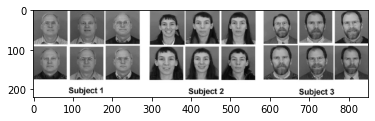

In [140]:
plt.imshow(imagem_gray, cmap="gray")

4º: chama o classificador

CARREGANDO O CLASSFICADOR:

In [141]:
classificador = cv2.CascadeClassifier("/home/johan/anaconda3/pkgs/opencv-3.4.3-py36_blas_openblash829a850_200/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")


5º: aplica o classficador na imagem

ACHANDO O NUMERO DE FACES COM BASE NO CLASSIFICADOR COM OS PARAMETROS DE **IMAGEM(imagem_gray)**, **ESCALA(1.3) que usa piramidização para redução da imagem de 30 em 30% até chegar no limite que o classificador foi construído** e **Número mínimo de características vizinhas que vai considerar(5)**:

In [142]:
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)

6º: confere o numero de faces

LÊ A QUANTIDADE DE FACES COMO SE FOSSE UMA LISTA

In [143]:
len(faces)

18

7º acessa os dados da face

os dados são compostos de:
[x(coordenada), y(coordenada), comprimento, altura]

É possivel obter esses dados só acessando o elemento da lista:


In [144]:
faces[0]

array([17, 12, 54, 54], dtype=int32)

PARA NÃO ESTRAGAR A IMAGEM ORIGINAL, FAZ-SE UMA CÓPIA:

In [145]:
imagem_retangulo = imagem.copy() #descobrir o que faz a função .copy()

PLOTANDO RETÂNGULOS:
parametros: imagem, coordenada, coordenada+dimensoes da face, cor, espessura do triangulo.

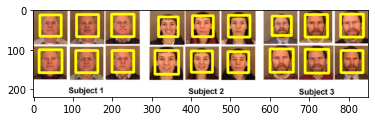

In [146]:
for(x,y,w,h) in faces:
    cv2.rectangle(imagem_retangulo, (x,y), (x+w, y+h), (255, 255, 0), 5)
plt.imshow(imagem_retangulo)

RETIRANDO ROSTOS DA IMAGEM:

com base em cada rosto, faz um slice notation e exporta

In [147]:
count = 0

for (x, y, w, h) in faces:
    count += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)    
    cv2.imwrite("rosto{}.png".format(count), imagem_roi)